In [ ]:
pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud


filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
df = pd.read_csv("/content/amazon_reviews.csv", sep=",")
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.00,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.00,best deal around,1373673600,2013-07-13,513,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      4915 non-null   object 
 1   asin            4915 non-null   object 
 2   reviewerName    4914 non-null   object 
 3   helpful         4915 non-null   object 
 4   reviewText      4914 non-null   object 
 5   overall         4915 non-null   float64
 6   summary         4915 non-null   object 
 7   unixReviewTime  4915 non-null   int64  
 8   reviewTime      4915 non-null   object 
 9   day_diff        4915 non-null   int64  
 10  helpful_yes     4915 non-null   int64  
 11  total_vote      4915 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 460.9+ KB


In [ ]:
df.describe()

,overall,unixReviewTime,day_diff,helpful_yes,total_vote
count,4915.00,4915.00,4915.00,4915.00,4915.00
mean,4.59,1379465001.67,437.37,1.31,1.52
std,1.00,15818574.32,209.44,41.62,44.12
min,1.00,1339200000.00,1.00,0.00,0.00
25%,5.00,1365897600.00,281.00,0.00,0.00
50%,5.00,1381276800.00,431.00,0.00,0.00
75%,5.00,1392163200.00,601.00,0.00,0.00
max,5.00,1406073600.00,1064.00,1952.00,2020.00


In [ ]:
# Normalizing Case Folding
df['reviewText'] = df['reviewText'].str.lower()

# Punctuations
df['reviewText'] = df['reviewText'].str.replace('[^\w\s]', '')

# Numbers
df['reviewText'] = df['reviewText'].str.replace('\d', '')

In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",no issues,4.00,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased this for my device it worked as adve...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected i should have sprung for ...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",this think has worked out greathad a diff bran...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought it with retail packaging arrived legit ...,5.00,best deal around,1373673600,2013-07-13,513,0,0


In [ ]:
# Stopwords
import nltk
nltk.download('stopwords')
sw = stopwords.words('english')
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Rarewords

drops = pd.Series(' '.join(df['reviewText']).split()).value_counts()[-1000:]
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

In [ ]:
# Tokenization
nltk.download("punkt")
df["reviewText"].apply(lambda x: TextBlob(x).words).head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0                                             [issues]
1    [purchased, device, worked, advertised, never,...
2    [works, expected, sprung, higher, capacity, th...
3    [think, worked, greathad, diff, bran, gb, card...
4    [bought, retail, packaging, arrived, legit, or...
Name: reviewText, dtype: object

In [ ]:
# Lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['reviewText'].head(10)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


0                                                issue
1    purchased device worked advertised never much ...
2    work expected sprung higher capacity think mad...
3    think worked greathad diff bran gb card went s...
4    bought retail packaging arrived legit orange e...
5    mini storage doesnt anything else supposed pur...
6    phone never skip beat file transfer speedy cor...
7    hard believe affordable digital become gb devi...
8    work htc rezound running short space gb sandis...
9    galaxy super fast card totally happy happy sti...
Name: reviewText, dtype: object

In [ ]:
#Term frequency
tf = df["reviewText"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.columns = ["words", "tf"]
tf.head(20)

,words,tf
0,issue,609.00
1,purchased,344.00
2,device,584.00
3,worked,460.00
4,advertised,111.00
5,never,358.00
6,much,403.00
7,phone,1909.00
8,memory,1378.00
9,since,243.00


In [ ]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8073 entries, 0 to 8072
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   words   8073 non-null   object 
 1   tf      8073 non-null   float64
dtypes: float64(1), object(1)
memory usage: 126.3+ KB


In [ ]:
tf.shape

(8073, 2)

In [ ]:
tf.describe()

,tf
count,8073.00
mean,15.33
std,96.17
min,1.00
25%,1.00
50%,1.00
75%,4.00
max,5537.00


In [ ]:
tf["tf"].describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99]).T

count   8073.00
mean      15.33
std       96.17
min        1.00
5%         1.00
10%        1.00
25%        1.00
50%        1.00
75%        4.00
80%        7.00
90%       20.00
95%       53.00
99%      262.56
max     5537.00
Name: tf, dtype: float64

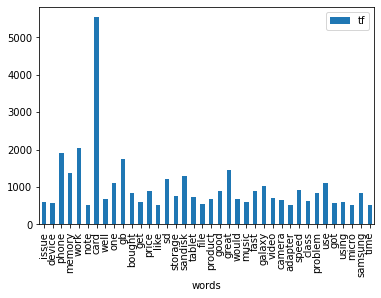

In [ ]:
# Barplot

tf[tf["tf"] > 500].plot.bar(x="words", y="tf")
plt.show()

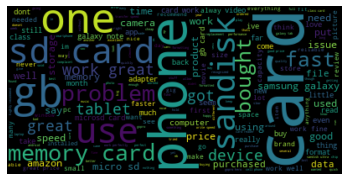

In [ ]:
# Wordcloud

text = " ".join(i for i in df.reviewText)
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


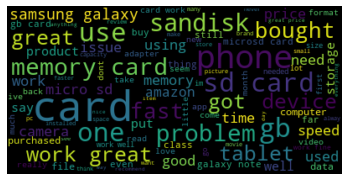

In [ ]:
wordcloud = WordCloud(max_font_size=50,
                      max_words=100
                      ).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file("wordcloud.png")

In [ ]:
# NLTK already has a built-in, pretrained sentiment analyzer called VADER (Valence Aware Dictionary and sEntiment Reasoner).
df.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issue,4.00,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased device worked advertised never much ...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expected sprung higher capacity think mad...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked greathad diff bran gb card went s...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought retail packaging arrived legit orange e...,5.00,best deal around,1373673600,2013-07-13,513,0,0
5,A2IDCSC6NVONIZ,B007WTAJTO,2Cents!,"[0, 0]",mini storage doesnt anything else supposed pur...,5.00,Not a lot to really be said,1367193600,2013-04-29,588,0,0
6,A26YHXZD5UFPVQ,B007WTAJTO,2K1Toaster,"[0, 0]",phone never skip beat file transfer speedy cor...,5.00,Works well,1382140800,2013-10-19,415,0,0
7,A3CW0ZLUO5X2B1,B007WTAJTO,"35-year Technology Consumer ""8-tracks to 802.11""","[0, 0]",hard believe affordable digital become gb devi...,5.00,32 GB for less than two sawbucks...what's not ...,1404950400,2014-10-07,62,0,0
8,A2CYJO155QP33S,B007WTAJTO,4evryoung,"[1, 1]",work htc rezound running short space gb sandis...,5.00,Loads of room,1395619200,2014-03-24,259,1,1
9,A2S7XG3ZC4VGOQ,B007WTAJTO,53rdcard,"[0, 0]",galaxy super fast card totally happy happy sti...,5.00,works great,1381449600,2013-11-10,393,0,0


In [ ]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
#checking the polarity in sentence
#example 1
sia.polarity_scores("kanye west is the best rapper")


{'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.6369}

In [ ]:
#example 2
sia.polarity_scores("i hope you die in hell")

{'neg': 0.634, 'neu': 0.149, 'pos': 0.216, 'compound': -0.765}

In [ ]:
#converting the text to upper case
df["reviewText"].apply(lambda x: x.upper())

0                                                   ISSUE
1       PURCHASED DEVICE WORKED ADVERTISED NEVER MUCH ...
2       WORK EXPECTED SPRUNG HIGHER CAPACITY THINK MAD...
3       THINK WORKED GREATHAD DIFF BRAN GB CARD WENT S...
4       BOUGHT RETAIL PACKAGING ARRIVED LEGIT ORANGE E...
                              ...                        
4910    BOUGHT SANDISK GB CLASS USE HTC INSPIRE MONTH ...
4911    USED EXTENDING CAPABILITY SAMSUNG GALAXY NOTE ...
4912    GREAT CARD FAST RELIABLE COME OPTIONAL ADAPTER...
4913           GOOD AMOUNT SPACE STUFF WANT FIT GOPRO SAY
4914    IVE HEARD BAD THING GB MICRO SD CARD CRAPPING ...
Name: reviewText, Length: 4915, dtype: object

In [ ]:
#applying the polarity fun to first 10 rows
df["reviewText"][0:10].apply(lambda x: sia.polarity_scores(x))

0    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2    {'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp...
3    {'neg': 0.0, 'neu': 0.831, 'pos': 0.169, 'comp...
4    {'neg': 0.0, 'neu': 0.765, 'pos': 0.235, 'comp...
5    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6    {'neg': 0.099, 'neu': 0.589, 'pos': 0.312, 'co...
7    {'neg': 0.066, 'neu': 0.703, 'pos': 0.231, 'co...
8    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9    {'neg': 0.0, 'neu': 0.457, 'pos': 0.543, 'comp...
Name: reviewText, dtype: object

In [ ]:
df["reviewText"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"])

0   0.00
1   0.00
2   0.40
3   0.65
4   0.86
5   0.00
6   0.90
7   0.82
8   0.00
9   0.92
Name: reviewText, dtype: float64

In [ ]:
#making a new column having compund value of polarity
df["polarity_score"] = df["reviewText"].apply(lambda x: sia.polarity_scores(x)["compound"])
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,polarity_score
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issue,4.00,Four Stars,1406073600,2014-07-23,138,0,0,0.00
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased device worked advertised never much ...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0.00
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expected sprung higher capacity think mad...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0,0.40
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked greathad diff bran gb card went s...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0.65
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought retail packaging arrived legit orange e...,5.00,best deal around,1373673600,2013-07-13,513,0,0,0.86


In [ ]:
#if compound value greater than 0 print positive else negative
df["reviewText"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

0    neg
1    neg
2    pos
3    pos
4    pos
5    neg
6    pos
7    pos
8    neg
9    pos
Name: reviewText, dtype: object

In [ ]:
#adding the above condition satement to the dataset as 'sentiment_label'
df["sentiment_label"] = df["reviewText"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,polarity_score,sentiment_label
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issue,4.00,Four Stars,1406073600,2014-07-23,138,0,0,0.00,neg
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased device worked advertised never much ...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0.00,neg
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expected sprung higher capacity think mad...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0,0.40,pos
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked greathad diff bran gb card went s...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0.65,pos
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought retail packaging arrived legit orange e...,5.00,best deal around,1373673600,2013-07-13,513,0,0,0.86,pos


In [ ]:
#finding the mean of the column
df.groupby("sentiment_label")["overall"].mean()

sentiment_label
neg   4.09
pos   4.71
Name: overall, dtype: float64

In [ ]:
df["sentiment_label"] = LabelEncoder().fit_transform(df["sentiment_label"])

X = df["reviewText"]
Y = df["sentiment_label"]

In [ ]:
X.head()

0                                                issue
1    purchased device worked advertised never much ...
2    work expected sprung higher capacity think mad...
3    think worked greathad diff bran gb card went s...
4    bought retail packaging arrived legit orange e...
Name: reviewText, dtype: object

In [ ]:
Y.head()

0    0
1    0
2    1
3    1
4    1
Name: sentiment_label, dtype: int64

In [ ]:
#splitting training data and test data
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
X_train , X_test,Y_train , Y_test = train_test_split(X , Y , test_size=0.2,random_state=2)
print(X.shape , X_train.shape , X_test.shape)


(4915,) (3932,) (983,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [ ]:
print(X_train)

3484    bought memory lumia work really faster previou...
1778    seen purchased lower price disappointed cost n...
724     bought gb micro sd galaxy gb smart phone incre...
350     must android product expandable memory slotsth...
765     using canon camplains really fast access adapt...
                              ...                        
3335    need format set fat micro sdxc worked box coul...
1099    got space speed class ok class copying file sc...
2514    wanted expand storage surface tablet price rig...
3606    needed class micro sd card small size large me...
2575    work expected fast actually installed hd car c...
Name: reviewText, Length: 3932, dtype: object


In [ ]:
print(X_train_features)

  (0, 4697)	0.29309722975998675
  (0, 2638)	0.28877047586830723
  (0, 2856)	0.2559354527214004
  (0, 1084)	0.3241121660908757
  (0, 979)	0.22752753233834058
  (0, 3639)	0.2534158545208565
  (0, 4542)	0.38960595544207877
  (0, 2087)	0.2800515298984498
  (0, 4827)	0.2525966009441935
  (0, 6842)	0.1354813531586964
  (0, 3443)	0.4061558048043497
  (0, 3593)	0.1722343398042093
  (0, 622)	0.19276020167748592
  (1, 784)	0.1019921800981335
  (1, 5296)	0.1666847265202479
  (1, 2489)	0.173894060174456
  (1, 3197)	0.38761679442628305
  (1, 4741)	0.28356513266605493
  (1, 4538)	0.28596577725550915
  (1, 3839)	0.2611478292955061
  (1, 1250)	0.31522567507058047
  (1, 1555)	0.35199819656675274
  (1, 4544)	0.1707397580627033
  (1, 3426)	0.35199819656675274
  (1, 4698)	0.2279529235983213
  :	:
  (3930, 5591)	0.3610930988170304
  (3930, 5533)	0.33648895484581826
  (3930, 3630)	0.2710025575163632
  (3930, 784)	0.13500290374145976
  (3930, 5296)	0.22063379827681895
  (3930, 2489)	0.23017650024105446
  (39

In [ ]:
model = LogisticRegression()
# training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

LogisticRegression()

In [ ]:
# prediction on training data

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
accuracy_on_training_data

0.8652085452695829

In [ ]:
# prediction on test data

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
accuracy_on_test_data

0.8077314343845371

In [ ]:
input_mail = ["I've had the item 12 months. I've always had minor problems. It just recently started freezing and rebooting my devices. 2 GS3's, currently S4. SanDisk is sending me a new one."]
# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Positive')

else:
  print('negative')

[0]
negative
